In [12]:
import pandas as pd


In [13]:
df = pd.read_csv('silverprices.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.set_index('Date', inplace=True)

In [15]:
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2023-08-17,23.042,11441.0,22.800,23.385,22.725
2023-08-16,22.856,10802.0,22.905,23.170,22.770
2023-08-15,22.656,60396.0,22.650,22.770,22.265
2023-08-14,22.708,51908.0,22.740,22.820,22.410
2023-08-11,22.743,48043.0,22.760,22.910,22.610


In [16]:
df.dropna(inplace=True)

In [17]:
df = df.iloc[::-1]
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2013-08-19,23.215,8249.0,23.330,23.640,23.010
2013-08-20,23.118,14280.0,23.200,23.350,22.320
2013-08-21,23.009,7326.0,23.020,23.400,22.810
2013-08-22,23.080,12238.0,22.920,23.365,22.500
2013-08-23,23.781,20102.0,23.235,24.140,22.935


<Axes: xlabel='Date'>

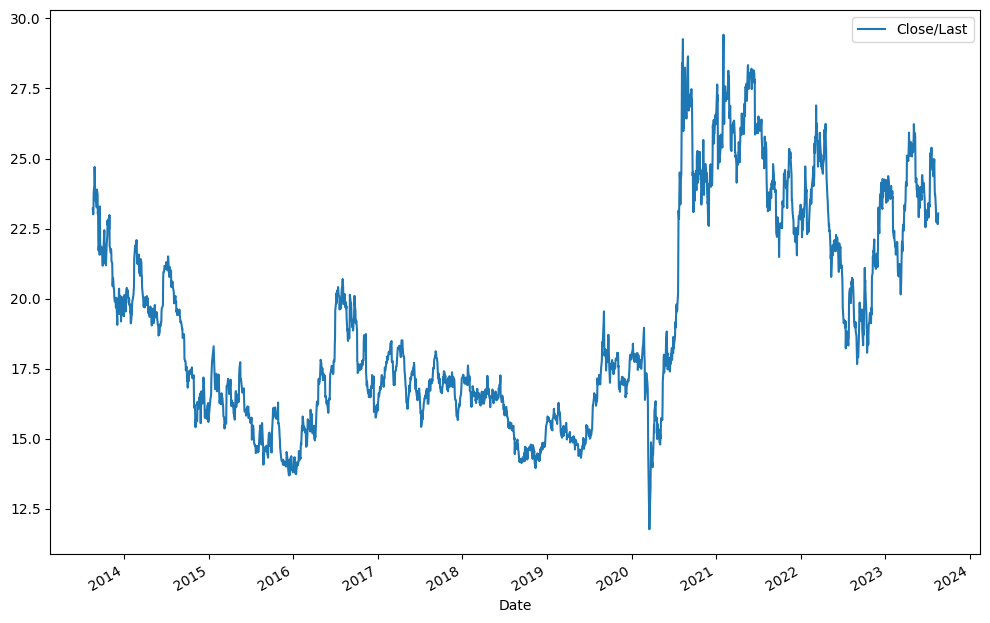

In [18]:
df["Close/Last"].plot(figsize=(12,8), legend=True)

In [25]:
import sklearn
from sklearn import svm, preprocessing

df = sklearn.utils.shuffle(df)

X = df.drop('Close/Last', axis=1).values
X = preprocessing.scale(X)
y = df['Close/Last'].values

test_size = 250

X_train = X[:-test_size]
y_train = y[:-test_size]

X_test = X[-test_size:]
y_test = y[-test_size:]

clf = svm.SVR(kernel='linear')
clf.fit(X_train, y_train)

SVR(kernel='linear')

In [26]:
clf.score(X_test, y_test)

0.9983909778228126

In [27]:
for X,y in zip(X_test, y_test):
    print(f"Model: {clf.predict([X])[0]}, Actual: {y}")

Model: 16.482040511906767, Actual: 16.412
Model: 15.821535934892124, Actual: 15.796
Model: 16.83591167730042, Actual: 16.674
Model: 16.432218374070167, Actual: 16.419
Model: 13.968622382709315, Actual: 13.952
Model: 14.652699707664405, Actual: 14.777
Model: 24.00669309307615, Actual: 24.271
Model: 22.341600047822396, Actual: 22.367
Model: 22.6436748850915, Actual: 22.337
Model: 14.49522761047297, Actual: 14.557
Model: 20.98795310085875, Actual: 20.886
Model: 17.34938802733752, Actual: 17.411
Model: 22.56825031933449, Actual: 22.646
Model: 17.476631902661158, Actual: 17.431
Model: 20.875816835978263, Actual: 20.889
Model: 20.114114602165625, Actual: 20.204
Model: 15.998412240440725, Actual: 16.038
Model: 19.596174981749826, Actual: 19.492
Model: 17.747260692219452, Actual: 17.701
Model: 16.44857379887584, Actual: 16.465
Model: 17.512059383128722, Actual: 17.607
Model: 16.62373687623454, Actual: 16.883
Model: 22.452881433817698, Actual: 22.393
Model: 15.218855552663214, Actual: 15.146
Mo